In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import RFE, RFECV
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import StratifiedKFold
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn import datasets, linear_model

In [2]:
load_path = 'D:\EECE499\Features\\'
#load_path = '..\..\\'

In [3]:
Features = pd.read_excel(load_path + 'Features.xlsx')

In [4]:
def sort_list(list1, list2): 
    zipped_pairs = zip(list2, list1) 
    z = [x for _, x in sorted(zipped_pairs)] 
    return z

In [5]:
def fix_pred(y, min_, max_):
    y = np.round(y)
    y = np.clip(y, min_, max_)
    return y

# Arousal

In [6]:
X = Features.iloc[:, :-5].values
y = Features.iloc[:, -5].values

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [8]:
standard_scaler = StandardScaler()
X_train = standard_scaler.fit_transform(X_train)
X_test = standard_scaler.transform(X_test)

In [9]:
classifier = linear_model.LinearRegression()
classifier.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [10]:
y_pred = classifier.predict(X_test)
y_pred = fix_pred(y_pred, 1, 6)

In [11]:
confusion_mtrx = confusion_matrix(y_test, y_pred)

In [12]:
confusion_mtrx

array([[ 0,  0,  0,  0,  1,  1,  0],
       [ 0,  0,  2,  1,  8,  0,  0],
       [ 0,  0,  1,  4, 14,  1,  0],
       [ 0,  0,  3, 13, 27,  3,  0],
       [ 0,  0,  0, 15, 56,  3,  0],
       [ 0,  0,  0, 14, 23,  6,  1],
       [ 0,  0,  0,  1,  7,  6,  2]], dtype=int64)

In [13]:
accuracy = accuracy_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)

In [14]:
print(accuracy, mae, rmse)

0.36619718309859156 0.9436619718309859 1.7417840375586855


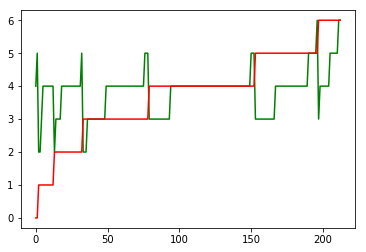

In [15]:
y_new = sort_list(y_pred, y_test)

plt.plot(y_new, color='green')
plt.plot(sorted(y_test), color='red')

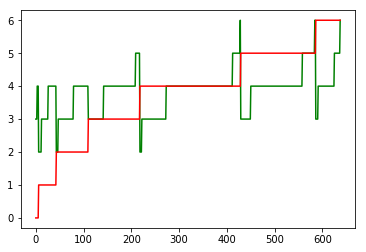

In [16]:
y_pred = classifier.predict(X_train)
y_pred = fix_pred(y_pred, 1, 6)

y_new = sort_list(y_pred, y_train)

plt.plot(y_new, color='green')
plt.plot(sorted(y_train), color='red')

Fitting estimator with 146 features.
Fitting estimator with 145 features.
Fitting estimator with 144 features.
Fitting estimator with 143 features.
Fitting estimator with 142 features.
Fitting estimator with 141 features.
Fitting estimator with 140 features.
Fitting estimator with 139 features.
Fitting estimator with 138 features.
Fitting estimator with 137 features.
Fitting estimator with 136 features.
Fitting estimator with 135 features.
Fitting estimator with 134 features.
Fitting estimator with 133 features.
Fitting estimator with 132 features.
Fitting estimator with 131 features.
Fitting estimator with 130 features.
Fitting estimator with 129 features.
Fitting estimator with 128 features.
Fitting estimator with 127 features.
Fitting estimator with 126 features.
Fitting estimator with 125 features.
Fitting estimator with 124 features.
Fitting estimator with 123 features.
Fitting estimator with 122 features.
Fitting estimator with 121 features.
Fitting estimator with 120 features.
F

Optimal number of features : 2


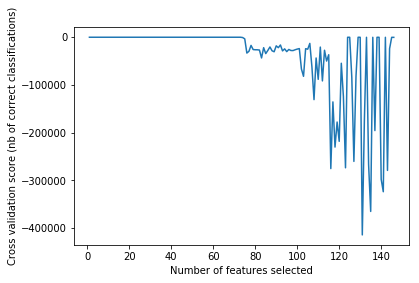

In [17]:
classifier = linear_model.LinearRegression()

rfecv = RFECV(estimator=classifier, step=1, cv=StratifiedKFold(2), scoring='neg_mean_absolute_error', verbose=1)
X_new = rfecv.fit_transform(X, y)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [18]:
X_new.shape

(851, 2)

In [19]:
rfecv.ranking_

array([143, 145,  41,  40,  69,  39, 144,  67,  65,  53,  63,  62,  66,
        79,  80,  76, 103,  78,  77, 119, 133,  99, 134,  87, 140,  86,
       136,  38,  37, 105,  36,  25,  17,  20, 109,   7, 126, 114, 118,
        24,  48,  26,   1,  11,  98, 132,  47,  88,  50, 125,  81,  55,
        31,  45,  15,  23, 123,  72,  84,  57, 135,  43,  61,  27,   4,
        82,  95, 131,  10,  85,  64,   5,  44,  60,  28,   3,  14,  22,
       107,   9,  89,  51,  34,  16,  56,  29,  46,  13,  21, 124,   8,
        70,  52,   2,  35,  59,  30,  42, 120,  18, 108,   6,  83,  58,
        32,  75,  49,  33,   1,  12,  19, 110,  54,  96,  68,  97, 104,
       101, 100,  73, 113, 130, 137, 127,  71,  90, 129, 141, 115, 142,
        74, 121, 116,  94, 138, 102, 117, 106,  93, 139, 122, 128,  91,
        92, 111, 112])

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size = 0.25, random_state = 0)

standard_scaler = StandardScaler()
X_train = standard_scaler.fit_transform(X_train)
X_test = standard_scaler.transform(X_test)


classifier = linear_model.LinearRegression()
classifier.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [21]:
y_pred = classifier.predict(X_test)
y_pred = fix_pred(y_pred, 1, 6)

In [22]:
accuracy = accuracy_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)

In [23]:
print(accuracy, mae, rmse)

0.3474178403755869 0.9530516431924883 1.7136150234741785


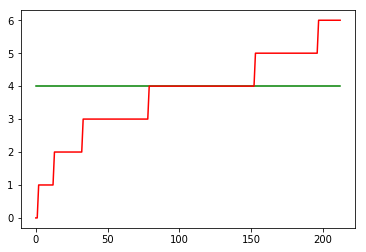

In [24]:
y_new = sort_list(y_pred, y_test)

plt.plot(y_new, color='green')
plt.plot(sorted(y_test), color='red')

# Engaging

In [25]:
X = Features.iloc[:, :-5].values
y = Features.iloc[:, -4].values

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [27]:
standard_scaler = StandardScaler()
X_train = standard_scaler.fit_transform(X_train)
X_test = standard_scaler.transform(X_test)

In [28]:
classifier = linear_model.LinearRegression()
classifier.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [29]:
y_pred = classifier.predict(X_test)
y_pred = fix_pred(y_pred, -3, 3)

In [30]:
confusion_mtrx = confusion_matrix(y_test, y_pred)

In [31]:
confusion_mtrx

array([[ 0,  0,  5, 15,  1,  0,  0],
       [ 0,  0,  1, 17,  3,  0,  0],
       [ 0,  0,  5, 28, 10,  0,  0],
       [ 1,  0,  8, 18,  8,  0,  0],
       [ 0,  2,  6, 16, 10,  0,  0],
       [ 0,  0, 10, 21,  6,  1,  0],
       [ 3,  0,  1,  8,  7,  2,  0]], dtype=int64)

In [32]:
accuracy = accuracy_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)

In [33]:
print(accuracy, mae, rmse)

0.1596244131455399 1.6150234741784038 3.868544600938967


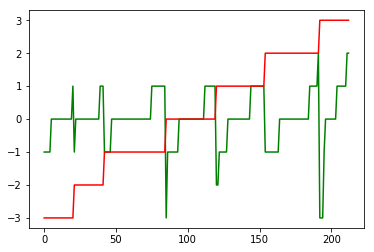

In [34]:
y_new = sort_list(y_pred, y_test)

plt.plot(y_new, color='green')
plt.plot(sorted(y_test), color='red')

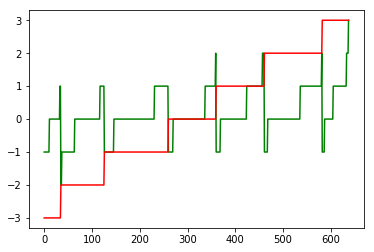

In [35]:
y_pred = classifier.predict(X_train)
y_pred = fix_pred(y_pred, -3, 3)

y_new = sort_list(y_pred, y_train)

plt.plot(y_new, color='green')
plt.plot(sorted(y_train), color='red')

Fitting estimator with 146 features.
Fitting estimator with 145 features.
Fitting estimator with 144 features.
Fitting estimator with 143 features.
Fitting estimator with 142 features.
Fitting estimator with 141 features.
Fitting estimator with 140 features.
Fitting estimator with 139 features.
Fitting estimator with 138 features.
Fitting estimator with 137 features.
Fitting estimator with 136 features.
Fitting estimator with 135 features.
Fitting estimator with 134 features.
Fitting estimator with 133 features.
Fitting estimator with 132 features.
Fitting estimator with 131 features.
Fitting estimator with 130 features.
Fitting estimator with 129 features.
Fitting estimator with 128 features.
Fitting estimator with 127 features.
Fitting estimator with 126 features.
Fitting estimator with 125 features.
Fitting estimator with 124 features.
Fitting estimator with 123 features.
Fitting estimator with 122 features.
Fitting estimator with 121 features.
Fitting estimator with 120 features.
F

Optimal number of features : 4


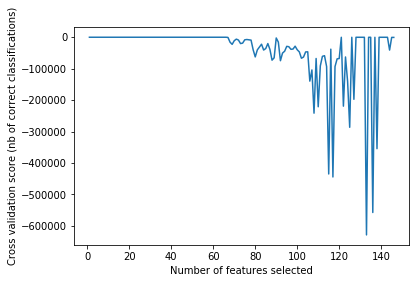

In [36]:
classifier = linear_model.LinearRegression()

rfecv = RFECV(estimator=classifier, step=1, cv=StratifiedKFold(2), scoring='neg_mean_absolute_error', verbose=1)
X_new = rfecv.fit_transform(X, y)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [37]:
X_new.shape

(851, 4)

In [38]:
rfecv.ranking_

array([141, 143,  43,  70,  52,  51, 142,  35,  33,  29,  31,  30,  34,
        80, 138,  64,  66, 129,  65,  95, 112,  89,  81, 113,  82, 108,
        87, 114,  69,  20,   2,  25,  85,  55,  96, 126,  48,  28, 140,
        76,  16,   5,  17, 137, 119, 128, 100,  47,  46,  97,  63,  14,
         4,  22, 123, 122, 106, 125,  40,  21, 103,  57,  12,   3,  13,
       115,  61, 104, 135,  38,  26,  77,  50,  23,   1,  11, 136,  54,
       132, 121,  24,  18, 107,  37,   8,   1,   9,  84,  99,  92, 139,
        19,  36, 117,  60,  10,   1,   7, 105,  59,  83, 116,  32,  39,
        62,  53,   6,   1,  15,  93, 133, 127,  98,  27,  67,  58, 111,
        75,  41,  49, 101, 102, 110,  68,  94,  42,  56, 120, 124,  88,
        44,  45,  72,  86, 130,  79,  71,  78,  73, 131,  74,  91, 134,
       118, 109,  90])

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size = 0.25, random_state = 0)

standard_scaler = StandardScaler()
X_train = standard_scaler.fit_transform(X_train)
X_test = standard_scaler.transform(X_test)


classifier = linear_model.LinearRegression()
classifier.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [40]:
y_pred = classifier.predict(X_test)
y_pred = fix_pred(y_pred, -3, 3)

In [41]:
accuracy = accuracy_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)

In [42]:
print(accuracy, mae, rmse)

0.1643192488262911 1.5070422535211268 3.244131455399061


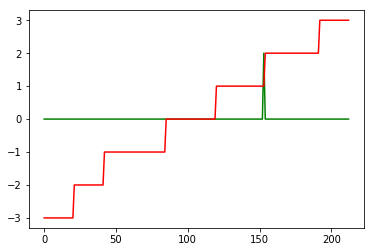

In [43]:
y_new = sort_list(y_pred, y_test)

plt.plot(y_new, color='green')
plt.plot(sorted(y_test), color='red')

# Familiarity

In [44]:
X = Features.iloc[:, :-5].values
y = Features.iloc[:, -3].values

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [46]:
standard_scaler = StandardScaler()
X_train = standard_scaler.fit_transform(X_train)
X_test = standard_scaler.transform(X_test)

In [47]:
classifier = linear_model.LinearRegression()
classifier.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [48]:
y_pred = classifier.predict(X_test)
y_pred = fix_pred(y_pred, 1, 6)

In [49]:
confusion_mtrx = confusion_matrix(y_test, y_pred)

In [50]:
confusion_mtrx

array([[ 0,  0,  0,  2,  1,  0],
       [ 0,  0,  0,  2,  1,  0],
       [ 0,  0,  0,  8,  4,  0],
       [ 0,  0,  1, 39, 29,  0],
       [ 0,  0,  0, 27, 55,  4],
       [ 1,  1,  2, 11, 20,  5]], dtype=int64)

In [51]:
accuracy = accuracy_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)

In [52]:
print(accuracy, mae, rmse)

0.4647887323943662 0.7089201877934272 1.215962441314554


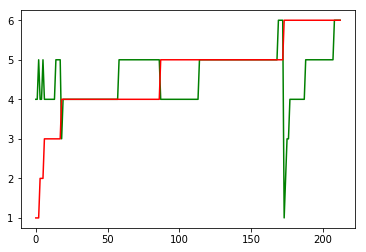

In [53]:
y_new = sort_list(y_pred, y_test)

plt.plot(y_new, color='green')
plt.plot(sorted(y_test), color='red')

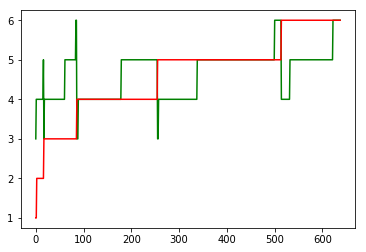

In [54]:
y_pred = classifier.predict(X_train)
y_pred = fix_pred(y_pred, 1, 6)

y_new = sort_list(y_pred, y_train)

plt.plot(y_new, color='green')
plt.plot(sorted(y_train), color='red')

Fitting estimator with 146 features.
Fitting estimator with 145 features.
Fitting estimator with 144 features.
Fitting estimator with 143 features.
Fitting estimator with 142 features.
Fitting estimator with 141 features.
Fitting estimator with 140 features.
Fitting estimator with 139 features.
Fitting estimator with 138 features.
Fitting estimator with 137 features.
Fitting estimator with 136 features.
Fitting estimator with 135 features.
Fitting estimator with 134 features.
Fitting estimator with 133 features.
Fitting estimator with 132 features.
Fitting estimator with 131 features.
Fitting estimator with 130 features.
Fitting estimator with 129 features.
Fitting estimator with 128 features.
Fitting estimator with 127 features.
Fitting estimator with 126 features.
Fitting estimator with 125 features.
Fitting estimator with 124 features.
Fitting estimator with 123 features.
Fitting estimator with 122 features.
Fitting estimator with 121 features.
Fitting estimator with 120 features.
F

Optimal number of features : 2


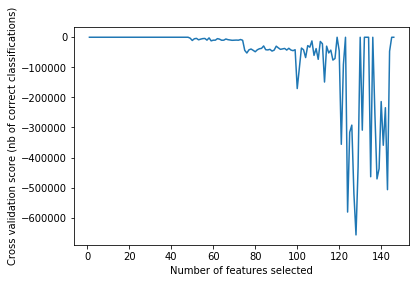

In [55]:
classifier = linear_model.LinearRegression()

rfecv = RFECV(estimator=classifier, step=1, cv=StratifiedKFold(2), scoring='neg_mean_absolute_error', verbose=1)
X_new = rfecv.fit_transform(X, y)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [56]:
X_new.shape

(851, 2)

In [57]:
rfecv.ranking_

array([143, 145,  54,  73,  57,  56, 144,  49,  45,  38,  44,  39,  48,
        60,  76,  68,  69,  59,  65,  79, 140,  86,  83,  87,  80,  90,
        84, 125, 129,  35,  23,   4,  42,  37, 103,  67,  11,  40, 136,
       126,   9,  33,  21, 124, 118, 134, 108,  19,  17,  71,  61,  10,
        24,   6, 107, 127, 130,  66,  15,  26,  75, 116,   8,  27,   2,
       114, 117, 111, 113,  32,  43,  52, 135,   7,  22,   1,  47,  36,
       102,  97,  14,  46,  74, 119,   5,  30,  20, 106,  95, 109,  70,
        13,  18,  72, 104,   3,  34,  28, 110, 105, 112,  92,  16,  25,
        53, 115,   1,  31,  29,  41,  93, 141, 123,  12,  55,  78, 131,
        64,  51,  94, 128, 122, 132,  63,  58,  50, 100, 142, 101,  98,
        62,  77,  96,  81, 133, 120, 121,  82,  89,  99,  88,  91, 139,
        85, 138, 137])

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size = 0.25, random_state = 0)

standard_scaler = StandardScaler()
X_train = standard_scaler.fit_transform(X_train)
X_test = standard_scaler.transform(X_test)


classifier = linear_model.LinearRegression()
classifier.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [59]:
y_pred = classifier.predict(X_test)
y_pred = fix_pred(y_pred, 1, 6)

In [60]:
accuracy = accuracy_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)

In [61]:
print(accuracy, mae, rmse)

0.38967136150234744 0.7370892018779343 1.1032863849765258


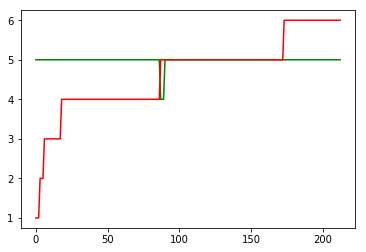

In [62]:
y_new = sort_list(y_pred, y_test)

plt.plot(y_new, color='green')
plt.plot(sorted(y_test), color='red')

# Liking

In [63]:
X = Features.iloc[:, :-5].values
y = Features.iloc[:, -2].values

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [65]:
standard_scaler = StandardScaler()
X_train = standard_scaler.fit_transform(X_train)
X_test = standard_scaler.transform(X_test)

In [66]:
classifier = linear_model.LinearRegression()
classifier.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [67]:
y_pred = classifier.predict(X_test)
y_pred = fix_pred(y_pred, 0, 6)

In [68]:
confusion_mtrx = confusion_matrix(y_test, y_pred)

In [69]:
confusion_mtrx

array([[ 0,  0,  0,  8,  1,  0,  0],
       [ 0,  0,  1,  7,  9,  1,  0],
       [ 0,  0,  3, 15, 17,  1,  0],
       [ 0,  0,  2, 13, 23,  3,  0],
       [ 0,  1,  5,  8, 16,  2,  0],
       [ 0,  1,  5, 17, 24,  3,  1],
       [ 1,  0,  0,  4, 12,  6,  3]], dtype=int64)

In [70]:
accuracy = accuracy_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)

In [71]:
print(accuracy, mae, rmse)

0.1784037558685446 1.4366197183098592 3.107981220657277


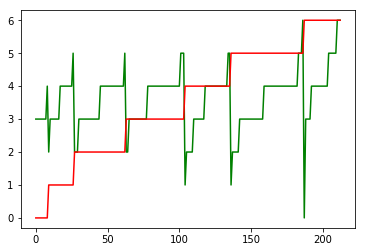

In [72]:
y_new = sort_list(y_pred, y_test)

plt.plot(y_new, color='green')
plt.plot(sorted(y_test), color='red')

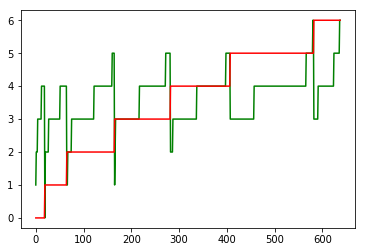

In [73]:
y_pred = classifier.predict(X_train)
y_pred = fix_pred(y_pred, 0, 6)

y_new = sort_list(y_pred, y_train)

plt.plot(y_new, color='green')
plt.plot(sorted(y_train), color='red')

Fitting estimator with 146 features.
Fitting estimator with 145 features.
Fitting estimator with 144 features.
Fitting estimator with 143 features.
Fitting estimator with 142 features.
Fitting estimator with 141 features.
Fitting estimator with 140 features.
Fitting estimator with 139 features.
Fitting estimator with 138 features.
Fitting estimator with 137 features.
Fitting estimator with 136 features.
Fitting estimator with 135 features.
Fitting estimator with 134 features.
Fitting estimator with 133 features.
Fitting estimator with 132 features.
Fitting estimator with 131 features.
Fitting estimator with 130 features.
Fitting estimator with 129 features.
Fitting estimator with 128 features.
Fitting estimator with 127 features.
Fitting estimator with 126 features.
Fitting estimator with 125 features.
Fitting estimator with 124 features.
Fitting estimator with 123 features.
Fitting estimator with 122 features.
Fitting estimator with 121 features.
Fitting estimator with 120 features.
F

Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 2 features.
Optimal number of features : 12


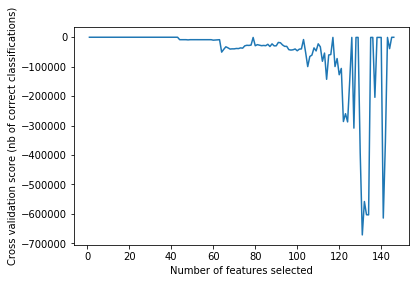

In [74]:
classifier = linear_model.LinearRegression()

rfecv = RFECV(estimator=classifier, step=1, cv=StratifiedKFold(2), scoring='neg_mean_absolute_error', verbose=1)
X_new = rfecv.fit_transform(X, y)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [75]:
X_new.shape

(851, 12)

In [76]:
rfecv.ranking_

array([133, 135,  57,  62,  70,  61, 134,  29,  41,  25,  27,  26,  28,
        78,  92,  80,  81,  77,  79,  86,  85, 119,  89, 130,  90, 117,
        96, 120,  60,  21,  17,   1,  32,  37, 129,  54,  47,  36, 104,
        39,   1,  13,   4,  40,  72, 112,  94,   5,  45, 125,   8,   1,
        23,   2,  63,  52, 106,  67,   6,  10, 115,  53,   3,  12,   1,
        50,  91, 107,  65,  35,  33,  71,  19,   1,  16,   1,  58, 101,
       118,  59,  44,  11, 105,   9,   1,  15,   1,  31,  38,  93,  55,
        20,  18, 126,  34,   1,  22,   1,  48,  51, 103, 116,   7,  24,
       114,  68,   1,  14,   1,  49,  56, 111,  66,  30,  75,  74, 113,
        98,  43,  82, 131, 121, 110,  76,  69,  42,  73, 122, 128, 108,
        64,  46,  84,  99, 127,  95,  83,  97, 109, 102,  88, 100, 123,
        87, 132, 124])

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size = 0.25, random_state = 0)

standard_scaler = StandardScaler()
X_train = standard_scaler.fit_transform(X_train)
X_test = standard_scaler.transform(X_test)


classifier = linear_model.LinearRegression()
classifier.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [78]:
y_pred = classifier.predict(X_test)
y_pred = fix_pred(y_pred, 0, 6)

In [79]:
accuracy = accuracy_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)

In [80]:
print(accuracy, mae, rmse)

0.1643192488262911 1.4741784037558685 3.2300469483568075


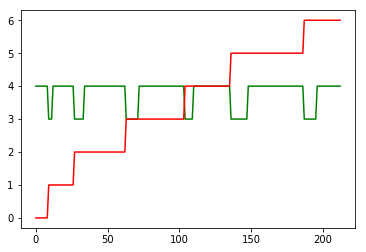

In [81]:
y_new = sort_list(y_pred, y_test)

plt.plot(y_new, color='green')
plt.plot(sorted(y_test), color='red')

# Valence

In [82]:
X = Features.iloc[:, :-5].values
y = Features.iloc[:, -1].values

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [84]:
standard_scaler = StandardScaler()
X_train = standard_scaler.fit_transform(X_train)
X_test = standard_scaler.transform(X_test)

In [85]:
classifier = linear_model.LinearRegression()
classifier.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [86]:
y_pred = classifier.predict(X_test)
y_pred = fix_pred(y_pred, 0, 4)

In [87]:
confusion_mtrx = confusion_matrix(y_test, y_pred)

In [88]:
confusion_mtrx

array([[12, 59, 28,  0,  0],
       [ 2, 21, 12,  0,  0],
       [ 3,  9,  9,  1,  0],
       [ 1, 11, 10,  7,  0],
       [ 2, 10, 14,  2,  0]], dtype=int64)

In [89]:
accuracy = accuracy_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)

In [90]:
print(accuracy, mae, rmse)

0.2300469483568075 1.164319248826291 2.112676056338028


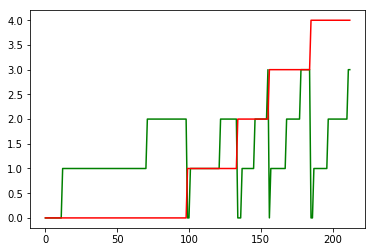

In [91]:
y_new = sort_list(y_pred, y_test)

plt.plot(y_new, color='green')
plt.plot(sorted(y_test), color='red')

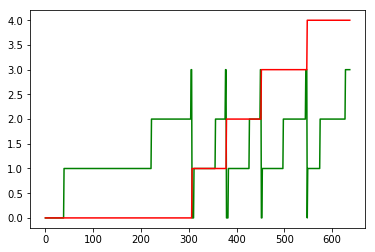

In [92]:
y_pred = classifier.predict(X_train)
y_pred = fix_pred(y_pred, 0, 4)

y_new = sort_list(y_pred, y_train)

plt.plot(y_new, color='green')
plt.plot(sorted(y_train), color='red')

Fitting estimator with 146 features.
Fitting estimator with 145 features.
Fitting estimator with 144 features.
Fitting estimator with 143 features.
Fitting estimator with 142 features.
Fitting estimator with 141 features.
Fitting estimator with 140 features.
Fitting estimator with 139 features.
Fitting estimator with 138 features.
Fitting estimator with 137 features.
Fitting estimator with 136 features.
Fitting estimator with 135 features.
Fitting estimator with 134 features.
Fitting estimator with 133 features.
Fitting estimator with 132 features.
Fitting estimator with 131 features.
Fitting estimator with 130 features.
Fitting estimator with 129 features.
Fitting estimator with 128 features.
Fitting estimator with 127 features.
Fitting estimator with 126 features.
Fitting estimator with 125 features.
Fitting estimator with 124 features.
Fitting estimator with 123 features.
Fitting estimator with 122 features.
Fitting estimator with 121 features.
Fitting estimator with 120 features.
F

Fitting estimator with 32 features.
Fitting estimator with 31 features.
Fitting estimator with 30 features.
Fitting estimator with 29 features.
Fitting estimator with 28 features.
Fitting estimator with 27 features.
Fitting estimator with 26 features.
Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 feature

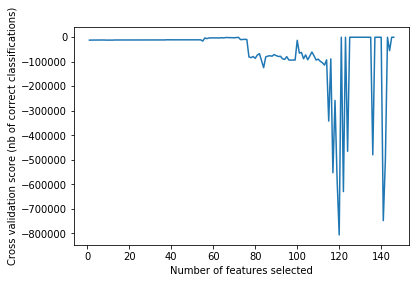

In [93]:
classifier = linear_model.LinearRegression()

rfecv = RFECV(estimator=classifier, step=1, cv=StratifiedKFold(2), scoring='neg_mean_absolute_error', verbose=1)
X_new = rfecv.fit_transform(X, y)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [94]:
X_new.shape

(851, 121)

In [95]:
rfecv.ranking_

array([24, 26,  1,  1,  1,  1, 25,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, 10,  1, 12,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  7,  1,
        1,  1,  1, 16,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, 15,  8,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  6,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  9,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  1,  1,
        1, 19,  4, 18, 11,  1,  1,  1,  5, 23,  1,  1,  1,  1,  1, 21,  1,
        1,  3,  1, 17, 20, 13, 14, 22,  1,  1])

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size = 0.25, random_state = 0)

standard_scaler = StandardScaler()
X_train = standard_scaler.fit_transform(X_train)
X_test = standard_scaler.transform(X_test)


classifier = linear_model.LinearRegression()
classifier.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [97]:
y_pred = classifier.predict(X_test)
y_pred = fix_pred(y_pred, 0, 4)

In [98]:
accuracy = accuracy_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)

In [99]:
print(accuracy, mae, rmse)

0.215962441314554 1.215962441314554 2.276995305164319


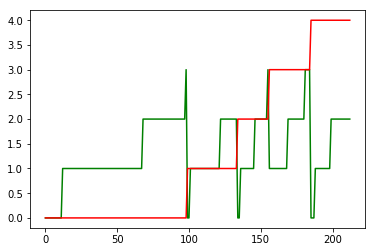

In [100]:
y_new = sort_list(y_pred, y_test)

plt.plot(y_new, color='green')
plt.plot(sorted(y_test), color='red')